In [1]:

from dpsgd_keras_slow import *
learning_rate = 0.1
batch_size = 1024
l2_norm_clip = 3.0
epochs = 40
delta = 1e-5  # it is recommended to use delta~=1/dataset_size
microbatch_size = 64

In [2]:
steps_in_one_epoch = 60000 // 1024

In [3]:
steps_in_one_epoch

58

In [4]:
accuracies = {}

In [5]:
import pickle 
import numpy 
for noise_multiplier in range(1,9):
    with open("dp_data/results/accuracies_%.1f_%.1f_%.1f_%d"%(learning_rate, noise_multiplier, l2_norm_clip, batch_size),"rb") as f:
        accuracies[noise_multiplier] = pickle.load(f)
    

In [6]:
accuracies[1].keys()

dict_keys(['sphinx+mnist+untied_bias', 'ALLnoise+mnist+untied_bias', 'mnist+untied_bias', 'mnist+untied_bias+noise_input', 'noisy_permanent_input'])

In [7]:
# get the noise:
import numpy as np
import pickle 

try:
    with open("dp_data/noise_epsilon_step_%d"%batch_size,"rb") as f:
        epsilons = pickle.load(f)
except:
    training_data_size = 60000
    max_step = 25000
    epsilons = [[] for i in range(10)]
    for noise_multiplier in range(0, 10, 1):
        print("noise_multiplier:", noise_multiplier)
        for step in range(1, max_step, 10):
            epsilons[noise_multiplier].append(compute_epsilon(step, batch_size/training_data_size, noise_multiplier))
    file = open("dp_data/noise_epsilon_step_%d"%batch_size,"wb")
    pickle.dump(epsilons, file)
    file.close()

## Plot the low, medium, high noise plot 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
accuracies[1].keys()

dict_keys(['sphinx+mnist+untied_bias', 'ALLnoise+mnist+untied_bias', 'mnist+untied_bias', 'mnist+untied_bias+noise_input', 'noisy_permanent_input'])

In [10]:
accuracies[1]['mnist+untied_bias+noise_input']['accuracy']

[0.1112833321094513,
 0.11240000277757645,
 0.11240000277757645,
 0.11246666312217712,
 0.11286666989326477,
 0.11683333665132523,
 0.12133333086967468,
 0.1295333355665207,
 0.13670000433921814,
 0.13985000550746918,
 0.14444999396800995,
 0.1458333283662796,
 0.1473499983549118,
 0.14728333055973053,
 0.15334999561309814,
 0.15264999866485596,
 0.1520666629076004,
 0.15231665968894958,
 0.15236666798591614,
 0.15441666543483734,
 0.15138334035873413,
 0.15538333356380463,
 0.15273332595825195,
 0.1569666713476181,
 0.1548333317041397,
 0.15443333983421326,
 0.1532166600227356,
 0.1575833261013031,
 0.15790000557899475,
 0.15514999628067017,
 0.15531666576862335,
 0.15680000185966492,
 0.15676666796207428,
 0.15569999814033508,
 0.155716672539711,
 0.15655000507831573,
 0.15691666305065155,
 0.1546500027179718,
 0.15826666355133057,
 0.15801666676998138]

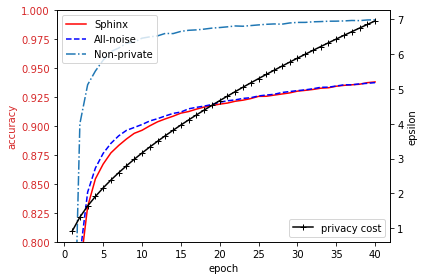

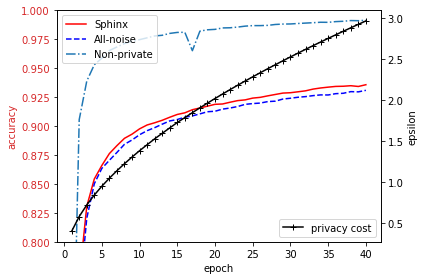

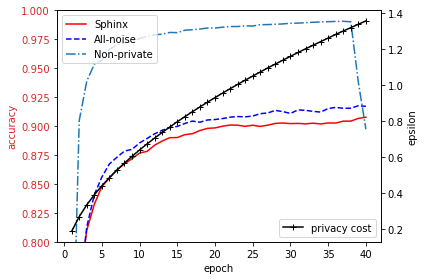

In [11]:
# Plot across the steps: every x step, one point
for noise_multiplier in [2,4,8]:
    #for model_type in ['sphinx+mnist+untied_bias', 'ALLnoise+mnist+untied_bias', 'mnist+untied_bias+noise_input', 'noisy_permanent_input']:    
    accuracy = accuracies[noise_multiplier]['sphinx+mnist+untied_bias']['accuracy']
    accuracy2 = accuracies[noise_multiplier]['ALLnoise+mnist+untied_bias']['accuracy']
    accuracy3 = accuracies[noise_multiplier]['mnist+untied_bias+noise_input']['accuracy']
    accuracy3 = accuracies[noise_multiplier]['mnist+untied_bias']['accuracy']
    
    #val_accuracy = accuracies[noise_multiplier][model_type]['val_accuracy']
    epoches = len(accuracy)
    epoch_list = [i for i in range(1,epoches+1)]

    tmp_epsilons = [epsilons[noise_multiplier][steps_in_one_epoch * (i+1) - 1] for i in range(epoches)]

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy', color=color)
    #ax1.plot(epoch_list, val_accuracy,'r', label="testing accuracy",color = 'tab:red')  
    ax1.plot( epoch_list, accuracy, 'r', label="Sphinx")  
    ax1.plot( epoch_list, accuracy2, '--b', label="All-noise")  
    ax1.plot( epoch_list, accuracy3, '-.', label="Non-private")
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim([0.8,1])
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.legend(loc=2)

    color = 'black'
    ax2.set_ylabel('epsilon', color=color)  # we already handled the x-label with ax1
    ax2.plot(epoch_list, tmp_epsilons, '-+', label="privacy cost", color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax2.legend(loc=4)
    #plt.savefig("%d-dp.png"%noise_multiplier)
    plt.show()

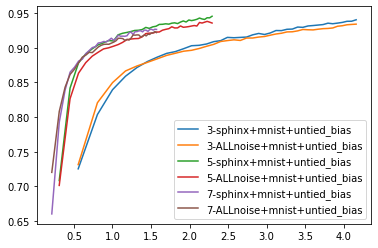

In [12]:
# Plot across the steps: every x step, one point
for noise_multiplier in [3,5,7]:
    for model_type in ['sphinx+mnist+untied_bias', 'ALLnoise+mnist+untied_bias']:#, 'mnist+untied_bias+noise_input', 'noisy_permanent_input']:
        
        accuracy = accuracies[noise_multiplier][model_type]['accuracy']
        val_accuracy = accuracies[noise_multiplier][model_type]['val_accuracy']
        epoches = len(accuracy)
        tmp_epsilons = [epsilons[noise_multiplier][steps_in_one_epoch * (i+1) - 1] for i in range(epoches)]
        
        plt.plot(tmp_epsilons, val_accuracy, label="%d-%s"%(noise_multiplier,model_type)) 
plt.legend()
plt.show()

In [13]:
def maxMergeList(somelist):
    best_list = []
    for i in range(len(somelist[0])):
        bestone = -1
        for onelist in somelist:
            if bestone < onelist[i]:
                bestone = onelist[i]
        best_list.append(bestone)
    return best_list

In [14]:
#maxMergeList([[1,2,3,4],[3,2,1,14],[1,31,2,3],[1,2,3,4],[3,33,1,14]]) #test

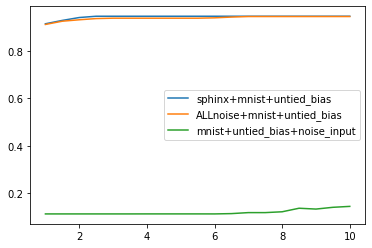

In [70]:
# get the maximum noise_multiplier for each x
# 做法：对于每一种model，首先给定privacy budget, 对于不同的noise_multiplier, 计算在该privacy budget下容许的步骤，
# 然后展示在容许步骤之内最大的accuracy，最后计算最大的该accuracy across different noise multiplier.
noise_chosen = []
best_accuracies = []
for model_type in ['sphinx+mnist+untied_bias', 'ALLnoise+mnist+untied_bias', 
                   "mnist+untied_bias+noise_input"]:
    one_noise_chosen = np.zeros(19)
    one_best_accuracies = np.zeros(19)
    for j, privacy_budget in enumerate(np.linspace(1,10,19)):
        #print("privacy_budget:", privacy_budget)
        for noise in accuracies.keys():
            for i in range(len(epsilons[noise])):
                if privacy_budget < epsilons[noise][i]:
                    break
            step_spent = i
            epoch_spent = (i // (steps_in_one_epoch)) 
            if epoch_spent <=0:
                continue
            if epoch_spent > epoches:
                epoch_spent = epoches
            #print("step_spent", step_spent)
            #print("epoch_spent:", epoch_spent)
            if one_best_accuracies[j] < accuracies[noise][model_type]['val_accuracy'][epoch_spent - 1]:
                one_best_accuracies[j] = accuracies[noise][model_type]['val_accuracy'][epoch_spent - 1]
                one_noise_chosen[j] = noise
    noise_chosen.append(one_noise_chosen)
    best_accuracies.append(one_best_accuracies)  
    plt.plot(np.linspace(1,10,19), one_best_accuracies, label="%s"%(model_type)) 
plt.legend()
plt.show()

In [64]:
best_accuracies

[array([0.91369998, 0.92790002, 0.94      , 0.9454    , 0.9454    ,
        0.9454    , 0.9454    , 0.9454    , 0.9454    , 0.9454    ,
        0.9454    , 0.9454    , 0.9454    , 0.9454    , 0.9454    ,
        0.9454    , 0.9454    , 0.9454    , 0.9454    ]),
 array([0.91079998, 0.92449999, 0.93049997, 0.93559998, 0.93720001,
        0.93720001, 0.93720001, 0.93720001, 0.93720001, 0.93720001,
        0.93870002, 0.94190001, 0.94419998, 0.94419998, 0.94419998,
        0.94419998, 0.94419998, 0.94419998, 0.94419998]),
 array([0.1135    , 0.1135    , 0.1135    , 0.1135    , 0.1135    ,
        0.1135    , 0.1136    , 0.1136    , 0.1136    , 0.1136    ,
        0.1135    , 0.1148    , 0.119     , 0.119     , 0.1225    ,
        0.1374    , 0.1339    , 0.14129999, 0.1452    ])]

In [66]:
noise_chosen

[array([7., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5.]),
 array([8., 8., 5., 5., 4., 4., 4., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.]),
 array([2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])]

In [20]:
tmp_epsilons

[0.21324368969189023,
 0.31011112330670876,
 0.38595148482349473,
 0.45076436875854897,
 0.5083653035570252,
 0.5609479406233802,
 0.6096177016558747,
 0.6552123382851427,
 0.6982591691306116,
 0.7392292340563752,
 0.7783415200754157,
 0.8158592376319145,
 0.8521017091730927,
 0.8871529072960573,
 0.9207472188522919,
 0.9539439082655021,
 0.9854678110480992,
 1.0169917138306963,
 1.0468757985025532,
 1.076637916330351,
 1.1057491072024104,
 1.1337506795507475,
 1.1617522518990846,
 1.1893339330128887,
 1.2155761976107673,
 1.241818462208646,
 1.2680607268065245,
 1.2936747412483802,
 1.3181589340823492,
 1.3426431269163182,
 1.3671273197502871,
 1.391611512584256,
 1.4152720275834576,
 1.4379993829013258,
 1.460726738219194,
 1.4834540935370621,
 1.5061814488549303,
 1.5289088041727985,
 1.5512904447767926,
 1.57226219509166]

In [16]:
accuracies.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
len(epsilons[1])

2500

In [18]:
len(accuracies[1]['sphinx+mnist+untied_bias']['accuracy'])

40

In [19]:
dict_keys(['sphinx+mnist+untied_bias', 'ALLnoise+mnist+untied_bias', 'mnist+untied_bias', 'mnist+untied_bias+noise_input', 'noisy_permanent_input'])

NameError: name 'dict_keys' is not defined